In [1]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,auc,roc_curve
import numpy as np
import os
import graphviz

C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Importing the dataset
data = pd.read_csv("D:\\SLIIT\\3rd year 2nd sem\\Machine Learning amd Optimization Methods\\Coding\\mushrooms.csv")

In [3]:
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
print("Dataset shape:",data.shape)

Dataset shape: (8124, 23)


In [8]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [9]:
#Taking the count of the unique occurences
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

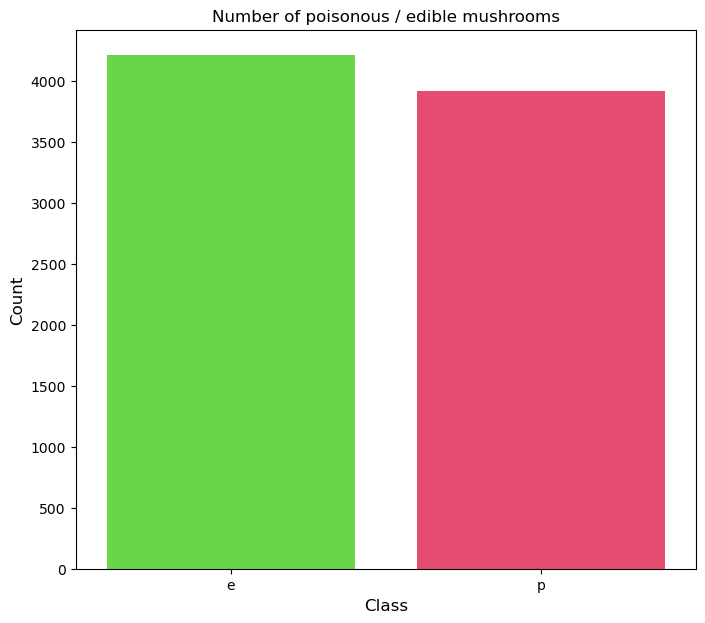

In [10]:
count = data['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(x=count.index,y=count.values,alpha=0.8,palette="prism")
plt.ylabel('Count',fontsize=12)
plt.xlabel('Class',fontsize=12)
plt.title('Number of poisonous / edible mushrooms')
plt.show()

* The data is categorical so we’ll use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column to a number.


* This approach requires the category column to be of ‘category’ datatype.

In [11]:
#Converting the datatype of the data from object to categorical
data = data.astype('category')
data.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [12]:
labelencoder = LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

* The above code is converting all the categorical variables in the dataset "data" into numerical variables. 


* The **fit_transform()** method of the LabelEncoder class is used to fit the data and convert it into numerical values at the same time. 


* The for loop is iterating through all the columns of the data, and the labelencoder object is transforming the values of each column into numerical values, which are then assigned back to the original columns in the dataset.

In [13]:
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


In [14]:
data['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [15]:
data = data.drop(['veil-type'],axis=1)

* It is used to transform and reshape data in a dataframe. 


* The function melts a dataframe into a long format, where columns are transformed into rows. 


* The function takes several arguments including the dataframe, **id_vars (which specifies the columns to keep)**, **value_vars (which specifies the columns to melt into rows)** and **var_name (which specifies the name of the melted column)**. 


* The result is a dataframe with a multi-level index, where the first level is the values specified in the **id_vars** argument and the second level is the melted columns. 


* The melted columns will contain the values specified in the value_vars argument.


* A violin plot is a method of plotting numeric data and is used to visualize the distribution of the data.


* It is similar to a box plot, with the addition of a rotated kernel density plot on each side. 


* The violin plot shows the distribution of the data across all levels of the categorical variable, and can give insight into the relationship between the numeric variable and the categorical variable. 


* The width of each violin represents the density of the data at different values, and the horizontal line inside each violin represents the median of the data. 


* In a violin plot, it is also possible to show multiple categories by stacking the violin plots on top of each other.'


* The **p.set_xticklabels()**  function is used to set the labels for the x-axis ticks in the violin plot. 


* This function sets the labels of the x-axis ticks to be the columns of the df_no_class dataframe, which has dropped the 'class' column. 


* The labels are rotated 90 degrees to make them readable in the plot.

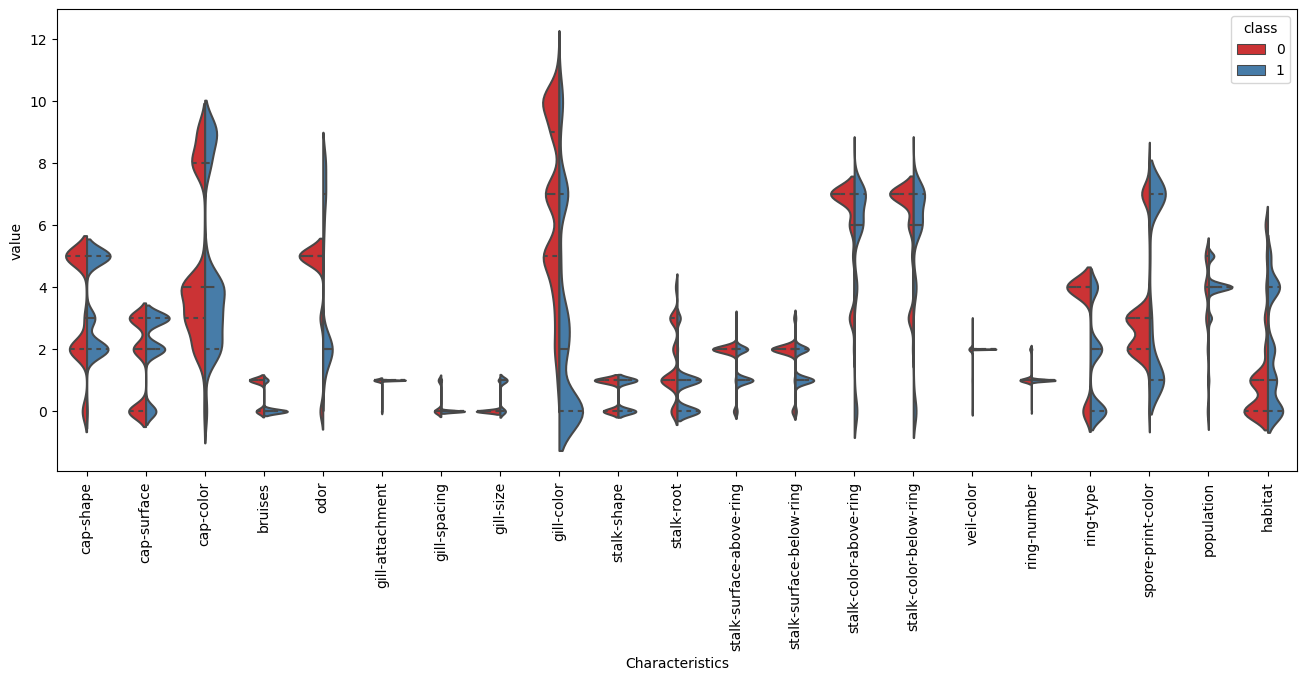

In [16]:
df_div = pd.melt(data,"class",var_name="Characteristics")
fig,ax = plt.subplots(figsize=(16,6))

p = sns.violinplot(ax=ax,x="Characteristics",y='value',hue='class',split=True,data=df_div,inner='quartile',palette='Set1')

df_no_class = data.drop(['class'],axis=1)

p.set_xticklabels(rotation=90,labels=list(df_no_class.columns));

* The **yticks** function in matplotlib's pyplot module is used to set the y-axis tick values, the corresponding labels and font properties. 


* It takes two parameters - a list of values and an optional list of labels.


* The function changes the display of y-axis labels, which can help to increase the readability of a plot.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'class'),
  Text(0, 1.5, 'cap-shape'),
  Text(0, 2.5, 'cap-surface'),
  Text(0, 3.5, 'cap-color'),
  Text(0, 4.5, 'bruises'),
  Text(0, 5.5, 'odor'),
  Text(0, 6.5, 'gill-attachment'),
  Text(0, 7.5, 'gill-spacing'),
  Text(0, 8.5, 'gill-size'),
  Text(0, 9.5, 'gill-color'),
  Text(0, 10.5, 'stalk-shape'),
  Text(0, 11.5, 'stalk-root'),
  Text(0, 12.5, 'stalk-surface-above-ring'),
  Text(0, 13.5, 'stalk-surface-below-ring'),
  Text(0, 14.5, 'stalk-color-above-ring'),
  Text(0, 15.5, 'stalk-color-below-ring'),
  Text(0, 16.5, 'veil-color'),
  Text(0, 17.5, 'ring-number'),
  Text(0, 18.5, 'ring-type'),
  Text(0, 19.5, 'spore-print-color'),
  Text(0, 20.5, 'population'),
  Text(0, 21.5, 'habitat')])

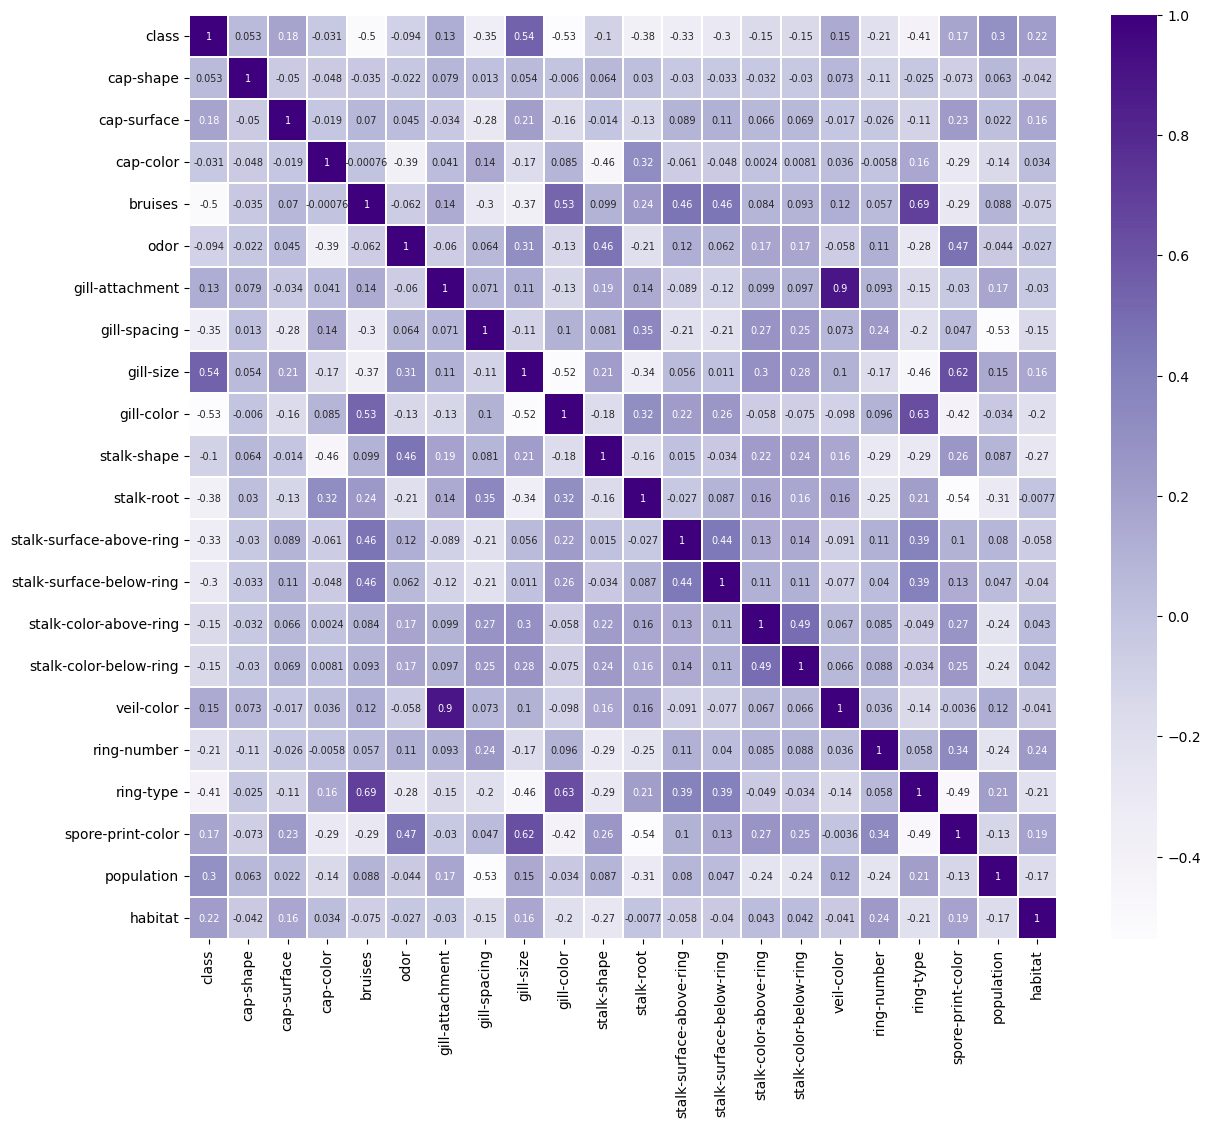

In [17]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="Purples",annot=True,annot_kws={"size":7})
plt.yticks(rotation=0)

* Usually, the least correlating variable is the most important one for classification. In this case, “gill-color” is -0.53.

In [18]:
data[["class","gill-color"]].groupby(['gill-color'],as_index=False).mean().sort_values(by='class',ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


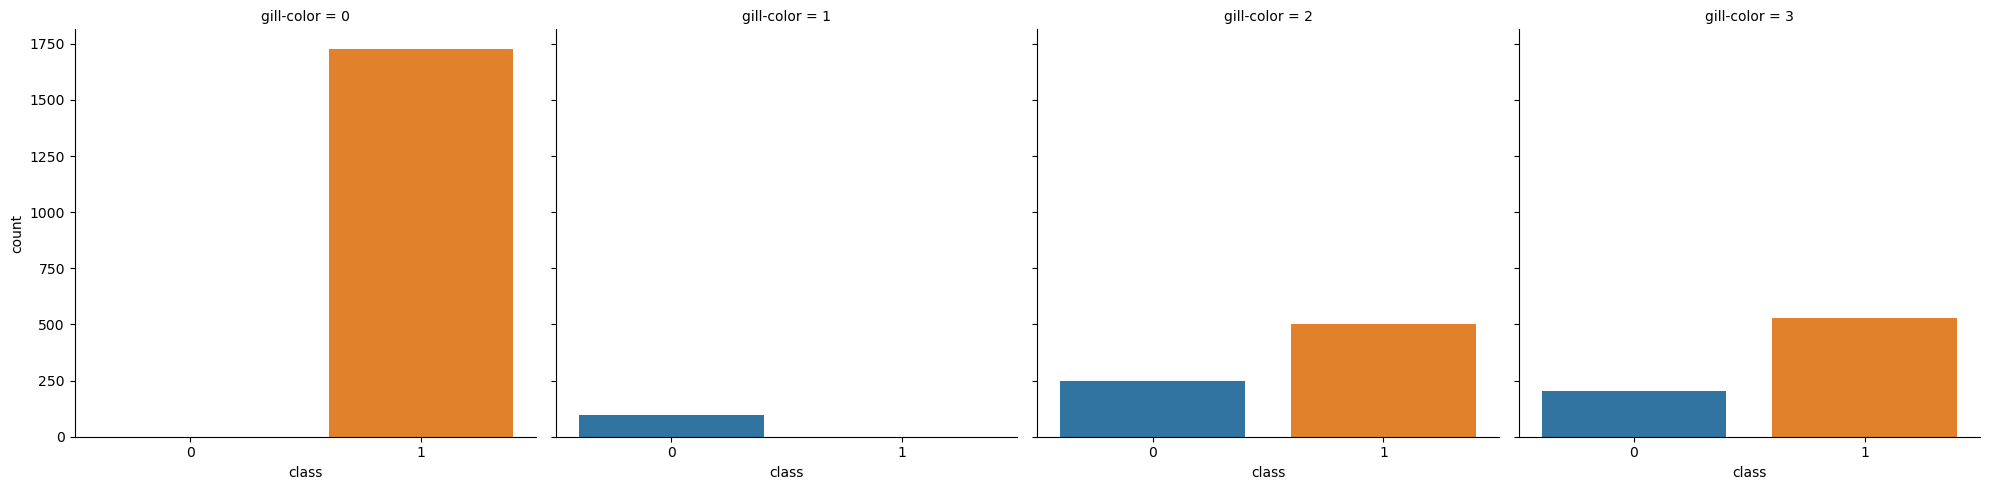

In [19]:
new_var = data[["class","gill-color"]]
new_var = new_var[new_var['gill-color'] <= 3.5]
sns.catplot(x='class',col='gill-color',data=new_var,kind='count',col_wrap=4)

* **seaborn.catplot()** is a function that creates a categorical plot, meaning it creates a plot based on categorical variables.


* It is used to visualize relationships between categorical variables and one or more continuous variables. 


* It supports several types of plots including boxplot, violinplot, stripplot, and swarmplot. 


* The catplot function is used to represent the data in a way that is easy to interpret, and can be used to visualize the distribution of the data and detect any patterns or outliers in the data. 


* The catplot function has several parameters including x, y, hue, data, kind, size, aspect, and col_wrap, etc.


* The **aspect** parameter specifies the aspect ratio of the subplots.


* Aspect ratio refers to the ratio of the width to the height of a plot or image.


* The **col_wrap** parameter specifies the number of columns in the subplot grid for plotting.

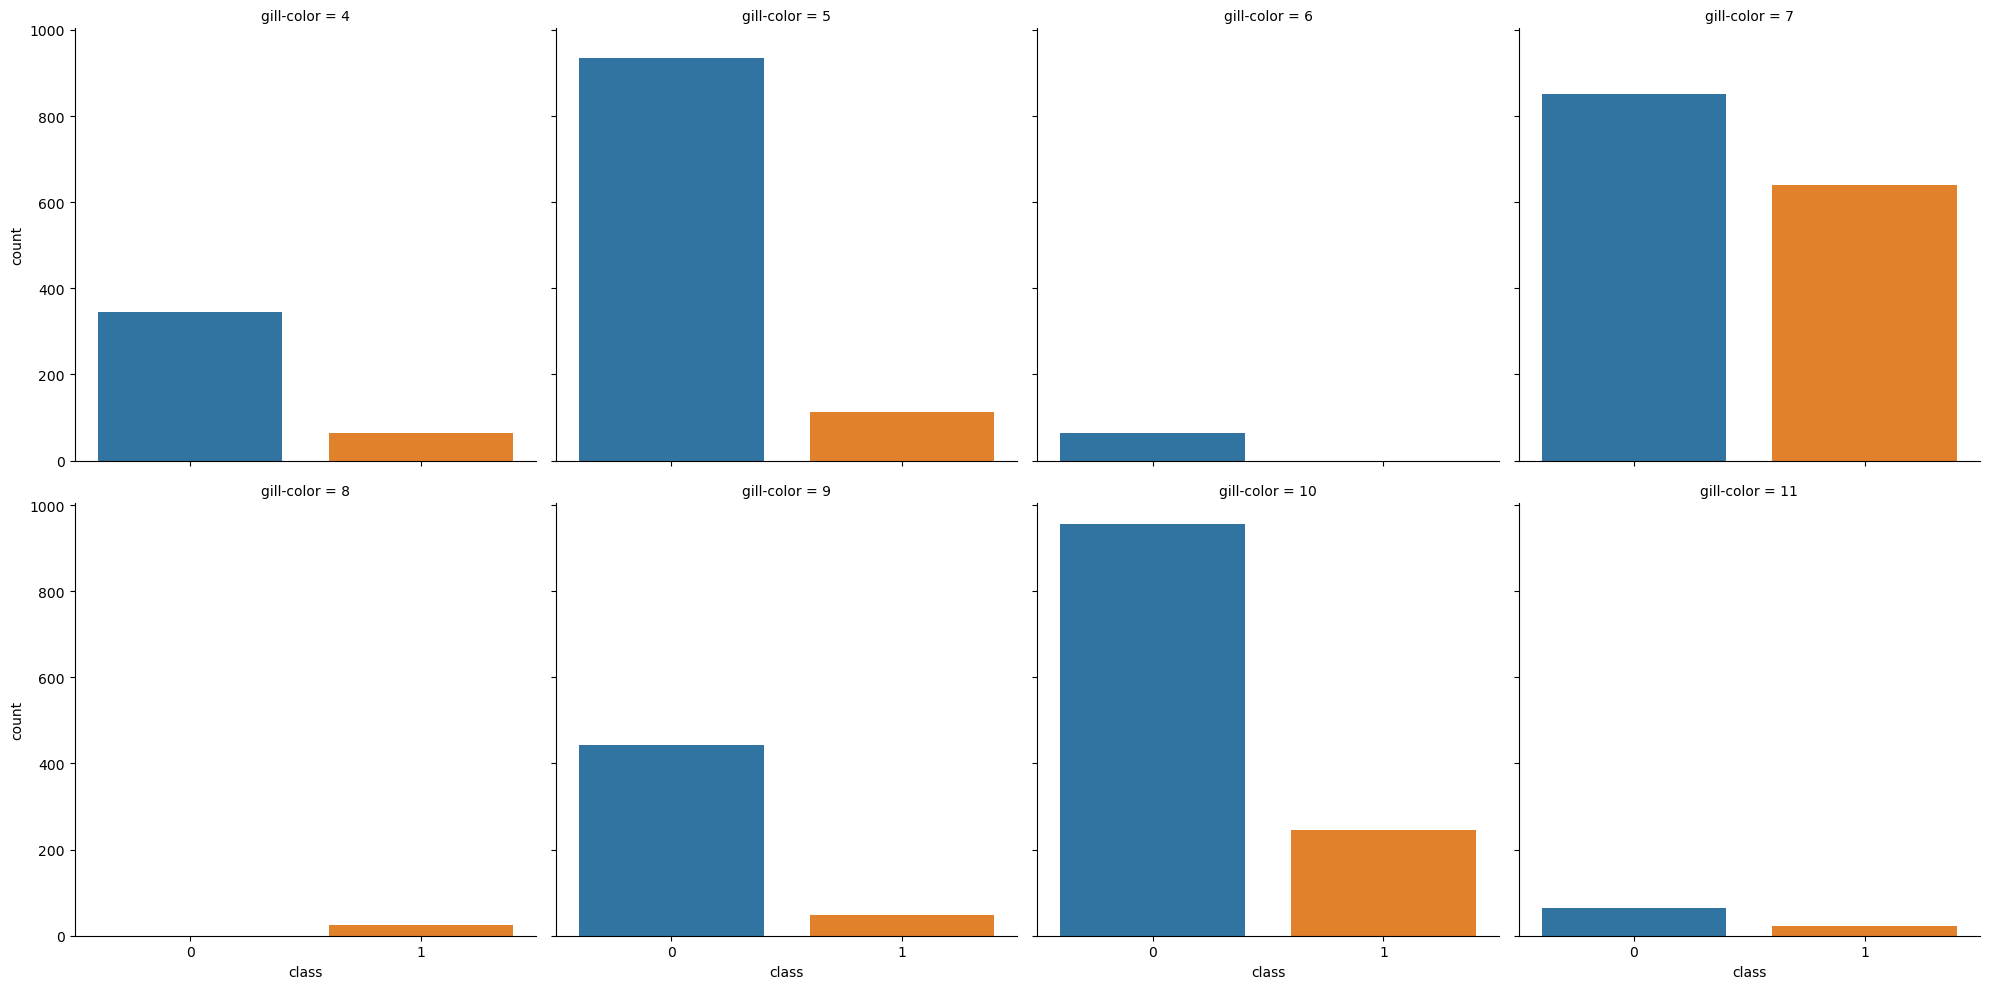

In [20]:
new_var = data[['class','gill-color']]
new_var = new_var[new_var['gill-color'] > 3.5]
sns.catplot(x='class',col='gill-color',data=new_var,kind='count',col_wrap=4)

In [21]:
x = data.drop(['class'],axis=1)
y = data['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.1)

In [22]:
x.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
5,5,3,9,1,0,1,0,0,5,0,...,2,2,7,7,2,1,4,2,2,1
6,0,2,8,1,0,1,0,0,2,0,...,2,2,7,7,2,1,4,2,2,3
7,0,3,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,3,3
8,5,3,8,1,6,1,0,1,7,0,...,2,2,7,7,2,1,4,2,4,1
9,0,2,9,1,0,1,0,0,2,0,...,2,2,7,7,2,1,4,2,3,3


In [23]:
y.head(10)

0    1
1    0
2    0
3    1
4    0
5    0
6    0
7    0
8    1
9    0
Name: class, dtype: int32

In [24]:
x_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4750,2,0,9,0,2,1,0,0,2,0,...,1,1,6,0,2,1,2,1,4,0
3026,5,0,5,0,1,1,1,1,9,0,...,2,2,7,7,2,1,4,2,3,0
3757,2,0,2,1,5,1,0,0,5,1,...,2,2,3,3,2,1,4,2,4,0
6167,2,2,2,0,8,1,0,1,0,1,...,2,1,6,7,2,1,0,7,4,4
6281,5,2,2,0,8,1,0,1,0,1,...,2,2,6,7,2,1,0,7,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,5,3,4,0,2,1,0,1,0,1,...,1,2,6,7,2,1,0,7,4,4
5390,3,3,2,1,5,1,0,0,10,0,...,2,2,7,2,2,2,0,7,1,6
860,2,3,4,1,3,1,0,0,10,0,...,2,3,7,7,2,1,4,3,5,4
7603,3,2,2,0,2,1,0,1,0,1,...,2,2,6,6,2,1,0,7,4,4


In [25]:
y_train

4750    1
3026    1
3757    0
6167    1
6281    1
       ..
5226    1
5390    0
860     0
7603    1
7270    0
Name: class, Length: 7311, dtype: int32

In [26]:
#Fitting the data using the decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

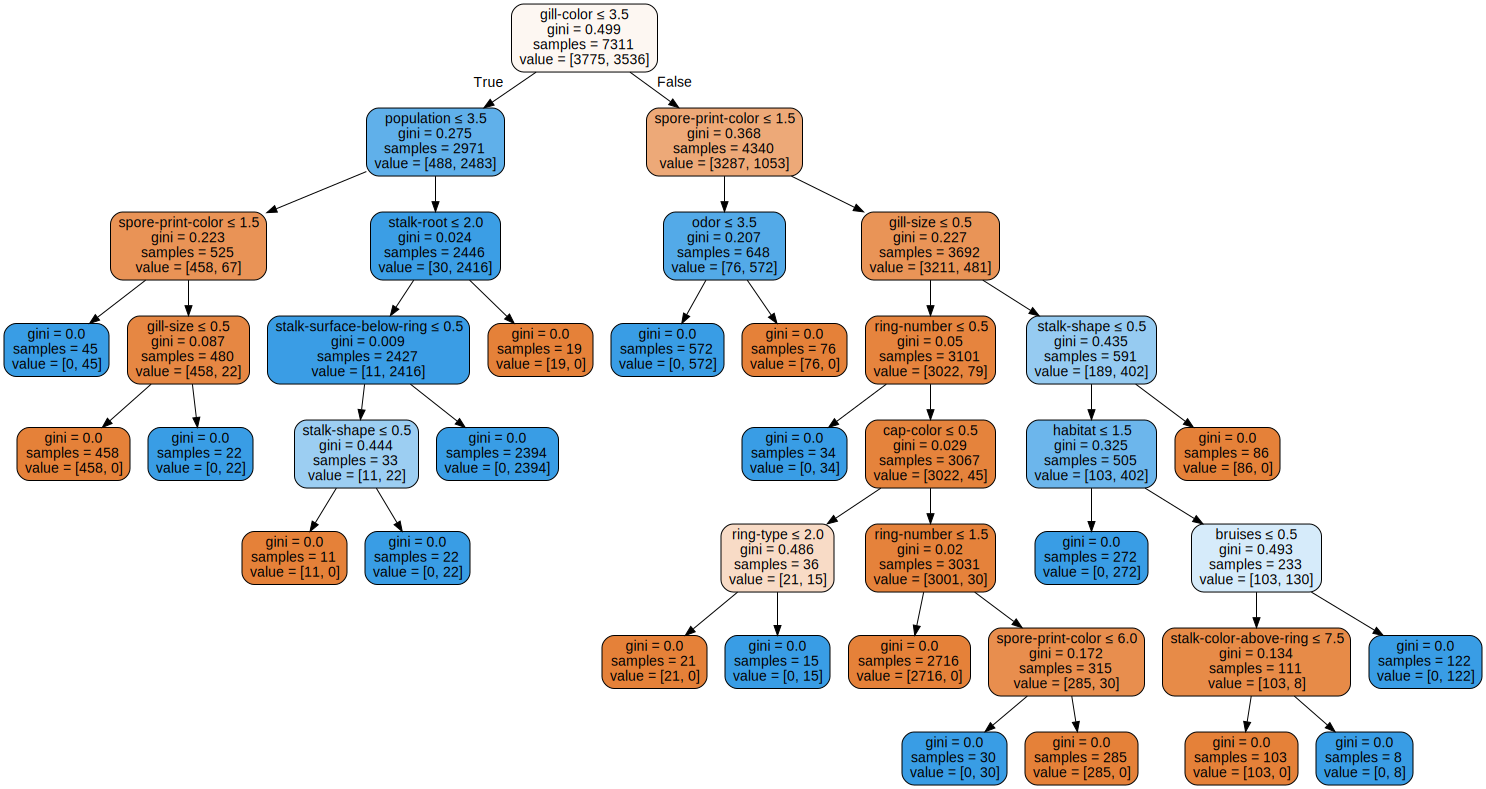

In [27]:
#Visualizing the decision tree
dot_data = export_graphviz(dt,out_file=None,feature_names=x.columns,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Feature Importance

* Feature importance is used to determine the most significant features that contribute to a model's predictions. 


* It helps to understand which features have the biggest impact on the outcome of a model and the model's accuracy.


* This information can be used to make better informed decisions on feature selection and model tuning. 


* Feature importance can also help in understanding the relationship between features and the target variable, which can provide valuable insights into the underlying relationships and patterns in the data.

* There are various methods to calculate the feature importance:

1. Tree-based methods - In tree-based models like Random Forest, Decision Tree, Gradient Boosting, etc, the feature importance can be calculated by using the feature_importances_ attribute of the model. The feature importances attribute gives us the measure of the contribution of each feature in the final prediction.


2. Linear models - In linear models like linear regression and logistic regression, feature importance can be calculated by using the coefficients of the model. The magnitude of the coefficients gives us the feature importance.


3. Permutation Importance - In permutation importance, the model's performance is evaluated by randomly permuting the values of each feature and calculating the decrease in model performance. The feature with the highest decrease in performance is considered to be the most important.


4. Correlation-based methods - Correlation-based methods calculate the feature importance by measuring the correlation between the feature and the target variable. Features with higher correlation values are considered to be more important.


5. Wrapper Methods - Wrapper methods use the models as a black box and evaluate the feature importance by evaluating the model performance on different feature subsets. The features that lead to a significant improvement in the model performance are considered to be important.

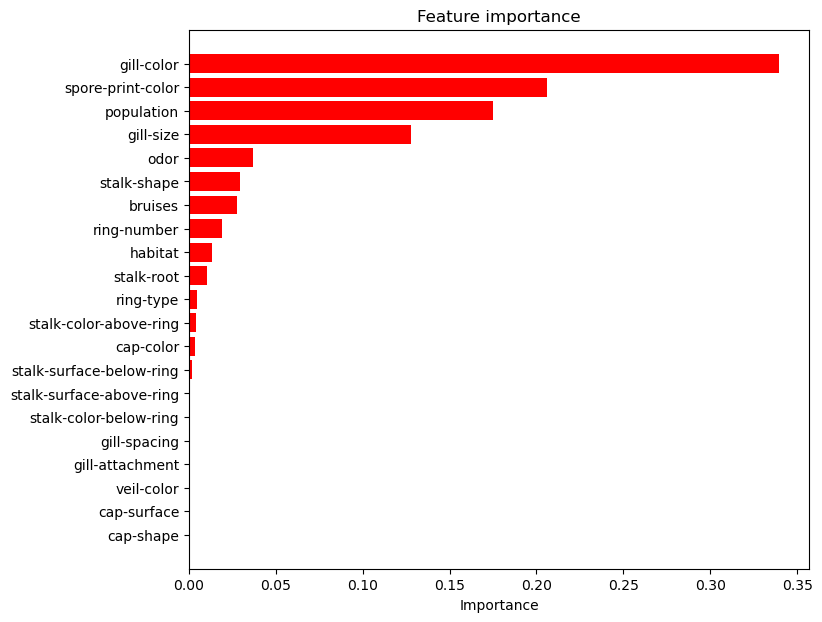

In [28]:
features_list = x.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)),feature_importance[sorted_idx],align='center',color='red') #create a horizontal bar graph
plt.yticks(range(len(sorted_idx)),features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

In [29]:
#Predicting and estimating the result
y_pred_dt = dt.predict(x_test)
print('Decision Tree Classifier report: \n\n',classification_report(y_test,y_pred_dt))
print("Test Accuracy : {}%".format(round(dt.score(x_test,y_test)*100,2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy : 100.0%


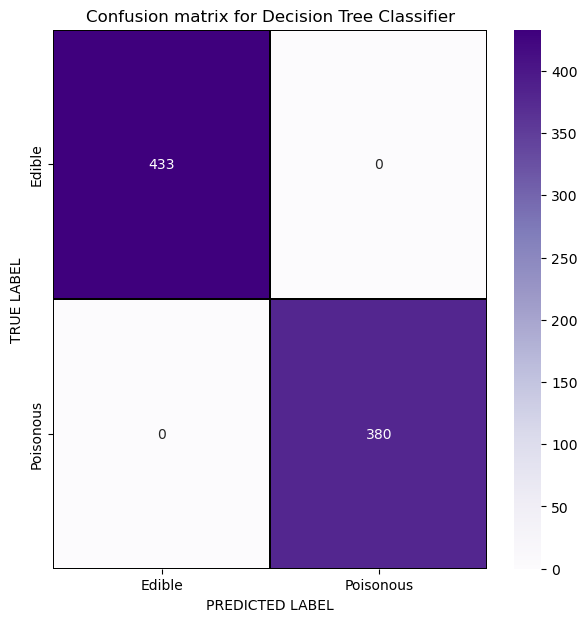

In [30]:
cm = confusion_matrix(y_test,y_pred_dt)

x_axis_labels = ['Edible','Poisonous']
y_axis_labels = ['Edible','Poisonous']

f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidth=0.2,linecolor="black",fmt=".0f",ax=ax,cmap="Purples",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion matrix for Decision Tree Classifier')
plt.show()

In [31]:
#Fitting the data using logistic regression classification
lr = LogisticRegression(solver="lbfgs",max_iter=500)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=500)

* The **solver** parameter in **LogisticRegression** states the algorithm to be used for optimization.


* The available algorithms are **newton-cg, lbfgs, liblinear, sag, and saga**.

In [32]:
print('Test Accuracy:{}%'.format(round(lr.score(x_test,y_test)*100,2)))

Test Accuracy:94.96%


In [33]:
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [34]:
print('Logistic Regression Classification report: \n\n',classification_report(y_test,y_pred_lr))

Logistic Regression Classification report: 

               precision    recall  f1-score   support

           0       0.96      0.94      0.95       433
           1       0.94      0.96      0.95       380

    accuracy                           0.95       813
   macro avg       0.95      0.95      0.95       813
weighted avg       0.95      0.95      0.95       813



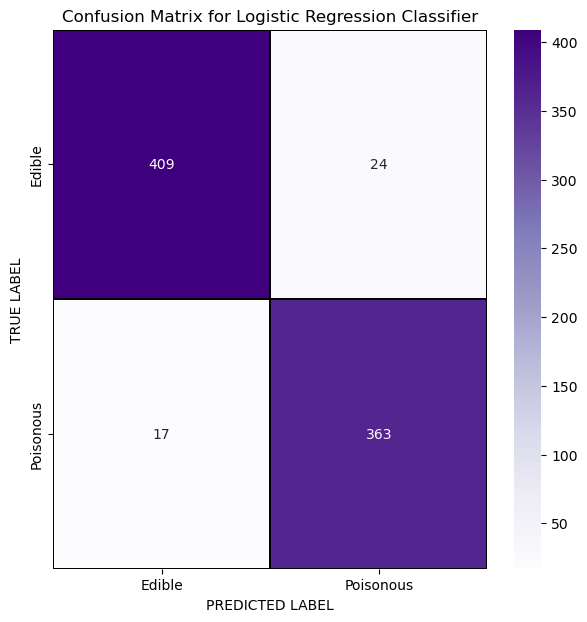

In [42]:
cm = confusion_matrix(y_test,y_pred_lr)

x_axis_labels = ["Edible","Poisonous"]
y_axis_labels = ["Edible","Poisonous"]

f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black", fmt=".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

In [43]:
#Using KNN Classification
best_Kvalue = 0
best_score = 0

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i
        
print("Best KNN value: {}".format(best_Kvalue))
print("Test Accuracy: {}".format(round(best_score * 100,2)))

Best KNN value: 1
Test Accuracy: 100.0


In [44]:
#Making predictions
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [45]:
print("KNN Classifier report: \n\n", classification_report(y_test,y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       433
           1       0.99      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



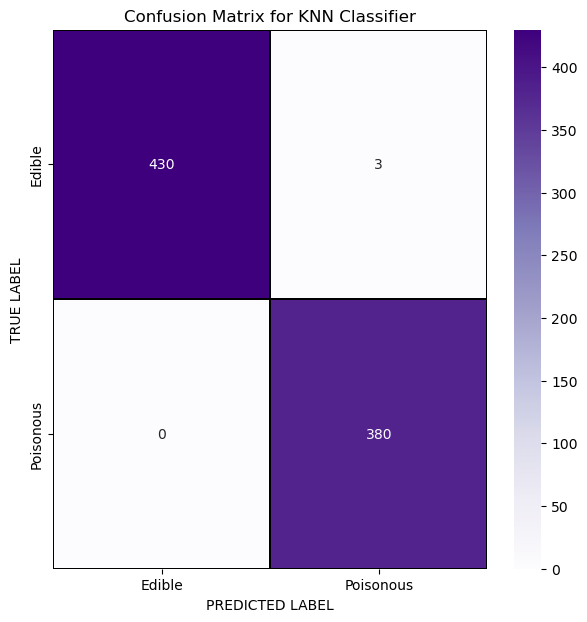

In [46]:
cm = confusion_matrix(y_test,y_pred_knn)

x_axis_labels = ["Edible","Poisonous"]
y_axis_labels = ["Edible","Poisonous"]

f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidth=0.2, linecolor="black", fmt=".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for KNN Classifier")
plt.show()

In [47]:
#Using SVM classification
svm = SVC(random_state=42, gamma='auto')
svm.fit(x_train,y_train)

SVC(gamma='auto', random_state=42)

* The **gamma** parameter is used to control the complexity of the model by defining the radial basis function (RBF) kernel coefficient. 


* The default value of **gamma** is **auto**, which means that the algorithm calculates the most appropriate value based on the data.

In [48]:
#Calculating the accuracy
print("Test Accuracy: {} %".format(round(svm.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0 %


In [49]:
y_pred_svm = svm.predict(x_test)
y_pred_svm

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [50]:
print("SVM Classification Report: \n\n", classification_report(y_test,y_pred_svm))

SVM Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



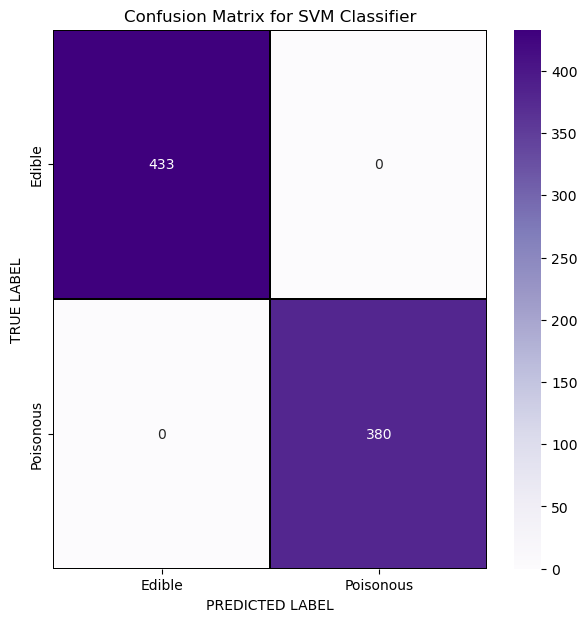

In [51]:
cm = confusion_matrix(y_test,y_pred_svm)

x_axis_labels = ["Edible","Poisonous"]
y_axis_labels = ["Edible","Poisonous"]

f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidth=0.2, linecolor="black", fmt=".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for SVM Classifier")
plt.show()

In [52]:
#Using Naive Bayes Classification
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [53]:
print("Test Accuracy: {}".format(round(nb.score(x_test,y_test)*100,2)))

Test Accuracy: 92.62


In [54]:
y_pred_nb = nb.predict(x_test)
y_pred_nb

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [55]:
print("Naive Bayes Classifier Report: \n\n",classification_report(y_test,y_pred_nb))

Naive Bayes Classifier Report: 

               precision    recall  f1-score   support

           0       0.94      0.92      0.93       433
           1       0.91      0.94      0.92       380

    accuracy                           0.93       813
   macro avg       0.93      0.93      0.93       813
weighted avg       0.93      0.93      0.93       813



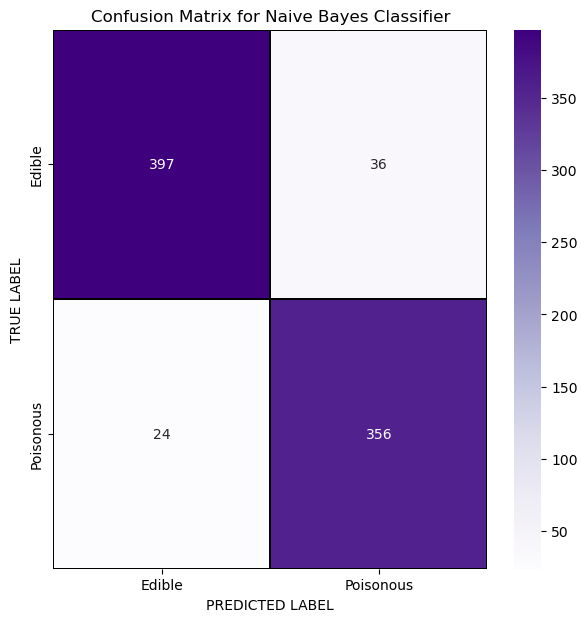

In [56]:
cm = confusion_matrix(y_test,y_pred_nb)

x_axis_labels = ["Edible","Poisonous"]
y_axis_labels = ["Edible","Poisonous"]

f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidth=0.2, linecolor="black", fmt=".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

In [58]:
#Using Random Forest Classification
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [59]:
print("Test Accuracy: {}".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0


In [60]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [61]:
print("Random Forest Classifier report: \n\n",classification_report(y_test,y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



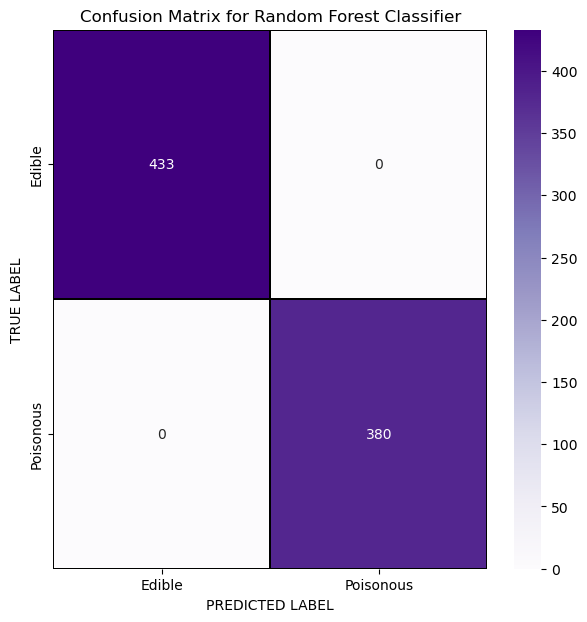

In [62]:
cm = confusion_matrix(y_test,y_pred_rf)

x_axis_labels = ["Edible","Poisonous"]
y_axis_labels = ["Edible","Poisonous"]

f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidth=0.2, linecolor="black", fmt=".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [63]:
#Making predictions
preds = dt.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]


C:\Users\binur\AppData\Local\Temp\ipykernel_13532\1079103483.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[:36].values)
